In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')
import warnings
# Suppress annoying harmless error.
warnings.simplefilter('ignore')

In [2]:
credit = pd.read_csv('../data/creditcard.csv').iloc[:,1:].dropna()

In [3]:
credit.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
print("Percentage of fraud in Dataset: {:.5f}%".format(100*np.sum(credit.Class)/len(credit.Class)))

Percentage of fraud in Dataset: 0.17275%


## Notes about the Data ##

* The dataset is highly imbalanced.

* Only .173% of the data is of the positive (Fraud) class.

* We will utilize the 28 Principal Components along with Amount to predict Fraud.

* We will try to maximize Recall (TP/TP+TN) in an attempt to minimize the chance of not finding fraud.

* Principal modeling will begin with Logistic Regression using probability output and gridding thresholds.

### Remedy for Imbalanced Data ###

* We will undersample the non fraudulent class


In [6]:
X = credit.loc[:, credit.columns != 'Class']
y = credit.loc[:, credit.columns == 'Class']

In [7]:
# Number of data points in the fraud class
number_frauds = len(credit[credit.Class == 1])
fraud_index = np.array(credit[credit.Class == 1].index)

# Get the indices of the nonfrauds
nonfraud_index = credit[credit.Class == 0].index

In [8]:
# from our nonfraud index nums randomly pick say 2*number_frauds
random_nonfraud_index = np.random.choice(nonfraud_index, 2*number_frauds, replace = False)
random_nonfraud_index = np.array(random_nonfraud_index)

# Appending the 2 indices
resampled_index = np.concatenate([fraud_index, random_nonfraud_index])

# Undersampled nonfraud dataset from credit
resampled_data = credit.iloc[resampled_index, :]

X_sample = resampled_data.loc[:, resampled_data.columns != 'Class']
y_sample = resampled_data.loc[:, resampled_data.columns == 'Class']

# Showing ratio
print("Percentage of nonfraud: {:.2f}%".format(100*len(resampled_data[resampled_data.Class == 0])/len(resampled_data)))
print("Percentage of fraud: {:.2f}%".format(100*len(resampled_data[resampled_data.Class == 1])/len(resampled_data)))
print("Number of datapoints in resampled data: {}".format(len(resampled_data)))

Percentage of nonfraud: 66.67%
Percentage of fraud: 33.33%
Number of datapoints in resampled data: 1476


In [9]:
from sklearn.cross_validation import train_test_split
# split original highly imbalanced credit card fraud dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3
                                                    , random_state = 42)

print(" -------------------------------------------  ")
print("Size original train dataset: {}".format(len(X_train)))
print("Size original test dataset: {}".format(len(X_test)))
print("Total number of datapoints in original dataset: {}".format(len(X_train) + len(X_test)))

# Undersampled dataset
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sample, y_sample, test_size = 0.3
                                                                                , random_state = 42)
print(" -------------------------------------------  ")
print("Size train dataset: {}".format(len(X_train_sample)))
print("Size test dataset: {}".format(len(X_test_sample)))
print("Total number of datapoints: {}".format(len(X_train_sample) + len(X_test_sample)))

 -------------------------------------------  
Size original train dataset: 199364
Size original test dataset: 85443
Total number of datapoints in original dataset: 284807
 -------------------------------------------  
Size train dataset: 1033
Size test dataset: 443
Total number of datapoints: 1476


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [11]:
from sklearn.metrics import make_scorer
recall_scorer = make_scorer(recall_score)
recall_scorer

make_scorer(recall_score)

### Test Run ###
 
* Run over grid of thresholds and calculate recall, precision, and error-cost

* I assume an error-cost function of False Negative is three times that of False Positive

---------------------------------------------------------------------------------
Threhold level:  0.1
Recall level of the testset:  0.967741935483871
Precision level of the testset:  0.7205240174672489
Cost of mistakes FN:3 and FP:1:  161

Confusion matrix, without normalization
[[564 128]
 [ 11 330]]
---------------------------------------------------------------------------------
Threhold level:  0.2
Recall level of the testset:  0.9237536656891495
Precision level of the testset:  0.8725761772853186
Cost of mistakes FN:3 and FP:1:  124

Confusion matrix, without normalization
[[646  46]
 [ 26 315]]
---------------------------------------------------------------------------------
Threhold level:  0.3
Recall level of the testset:  0.9002932551319648
Precision level of the testset:  0.953416149068323
Cost of mistakes FN:3 and FP:1:  117

Confusion matrix, without normalization
[[677  15]
 [ 34 307]]
---------------------------------------------------------------------------------
Threh

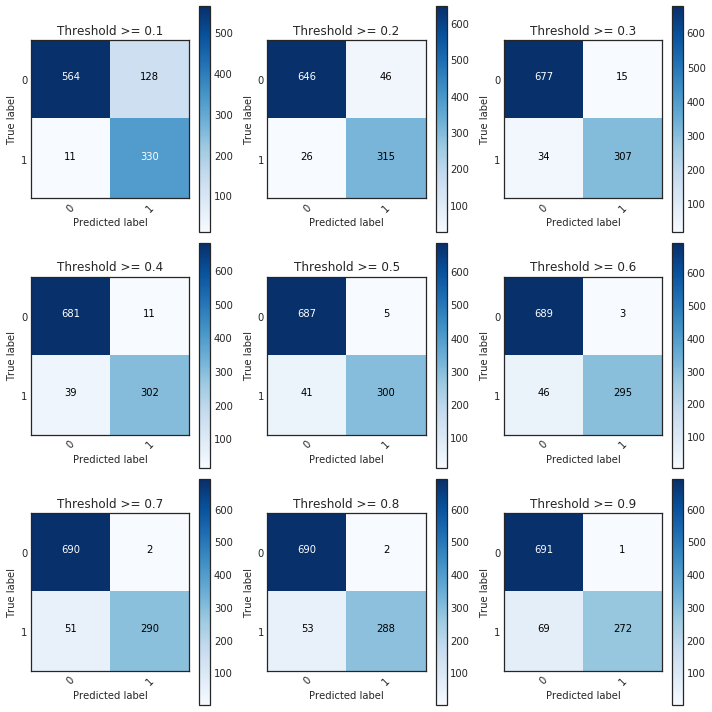

In [28]:
import itertools
lr = LogisticRegression(C = .1, penalty = 'l1')
lr.fit(X_train_sample, y_train_sample.values.ravel())
# now we get probability predictions on test sample
y_pred_sample_proba = lr.predict_proba(X_train_sample.values)

# set of prob. thresholds for predicting 1 (fraud)
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_recall = y_pred_sample_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_train_sample, y_test_predictions_recall)
    np.set_printoptions(precision=2)
    
    print("---------------------------------------------------------------------------------")
    print("Threhold level: ", i)
    print("Recall level of the testset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
    print("Precision level of the testset: ", cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1]))
    print("Cost of mistakes FN:3 and FP:1: ", 1*cnf_matrix[0,1]+ 3*cnf_matrix[1,0])
    print("")

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 

In [29]:


# now we get probability predictions on test sample
y_pred_sample_proba = lr.predict_proba(X_sample.values)

# set of prob. thresholds for predicting 1 (fraud)
Cvals = [.01,.1,1,10,20,30,40,50]
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

bestscore = 10e9
rec = 0
prec = 0
thres = 0
bestC = 0
for i in thresholds:
    for cval in Cvals :
        lr = LogisticRegression(C =cval, penalty = 'l1')
        lr.fit(X_train_sample, y_train_sample.values.ravel())
        # now we get probability predictions on test sample
        y_pred_sample_proba = lr.predict_proba(X_train_sample.values)
        y_test_predictions_recall = y_pred_sample_proba[:,1] > i
        # Compute confusion matrix
        cnf_matrix = confusion_matrix(y_train_sample, y_test_predictions_recall)
        np.set_printoptions(precision=2)
         
        if 1*cnf_matrix[0,1]+ 3*cnf_matrix[1,0] < bestscore:
            bestscore = 1*cnf_matrix[0,1]+ 3*cnf_matrix[1,0]
            rec = cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
            prec = cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1])
            bestC = cval
            thres = i
        
print("threshold: ", thres)
print("C Value: ", bestC)
print("Recall level of the testset: ", rec)
print("Precision level of the testset: ", prec)
print("Cost of mistakes FN:3 and FP:1: ", bestscore)

threshold:  0.3
C Value:  10
Recall level of the testset:  0.9149560117302052
Precision level of the testset:  0.9541284403669725
Cost of mistakes FN:3 and FP:1:  102


---------------------------------------------------------------------------------
Threhold level:  0.3
Recall level of the testset:  0.9668874172185431
Precision level of the testset:  0.9605263157894737
Cost of mistakes FN:3 and FP:1:  21

Confusion matrix, without normalization
[[286   6]
 [  5 146]]


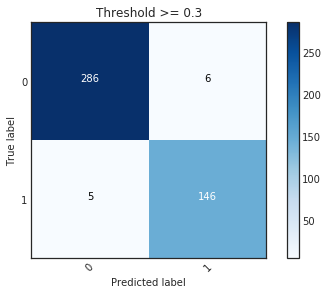

In [33]:
lr = LogisticRegression(C = 10, penalty = 'l1')
lr.fit(X_test_sample, y_test_sample.values.ravel())
# now we get probability predictions on test sample
y_pred_sample_proba = lr.predict_proba(X_test_sample.values)
y_test_predictions_recall = y_pred_sample_proba[:,1] > .3

cnf_matrix = confusion_matrix(y_test_sample, y_test_predictions_recall)
np.set_printoptions(precision=2)

print("---------------------------------------------------------------------------------")
print("Threhold level: ", 0.3)
print("Recall level of the testset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print("Precision level of the testset: ", cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1]))
print("Cost of mistakes FN:3 and FP:1: ", 1*cnf_matrix[0,1]+ 3*cnf_matrix[1,0])
print("")

# Plot non-normalized confusion matrix
class_names = [0,1]
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Threshold >= 0.3') 

### Test Results on Undersampled Dataset ###

* Excellent balance of high recall and precision

* Low overall cost

* Now we must run the model on the original dataset

---------------------------------------------------------------------------------
Threhold level:  0.3
Recall level of the testset:  0.7279411764705882
Precision level of the testset:  0.8461538461538461
Cost of mistakes FN:3 and FP:1:  129

Confusion matrix, without normalization
[[85289    18]
 [   37    99]]


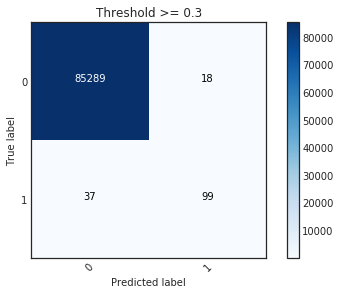

In [35]:
lr = LogisticRegression(C = 10, penalty = 'l1')
lr.fit(X_test, y_test.values.ravel())
# now we get probability predictions on test sample
y_pred_sample_proba = lr.predict_proba(X_test.values)
y_test_predictions_recall = y_pred_sample_proba[:,1] > .3

cnf_matrix = confusion_matrix(y_test, y_test_predictions_recall)
np.set_printoptions(precision=2)

print("---------------------------------------------------------------------------------")
print("Threhold level: ", 0.3)
print("Recall level of the testset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print("Precision level of the testset: ", cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1]))
print("Cost of mistakes FN:3 and FP:1: ", 1*cnf_matrix[0,1]+ 3*cnf_matrix[1,0])
print("")

# Plot non-normalized confusion matrix
class_names = [0,1]
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Threshold >= 0.3') 

### Final Results on Actual Test Dataset ###

* Recall of .728

* Precision of .846